<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm"><b>PROJECT</b></h1>
    <p style="margin-bottom:0.25cm">Course: <b>Data Analysis in Rehabilitation</b>
    <br>
        Master in Neuroengineering and Rehabilitation</p>
    <b>Prof. Joan F. Alonso</b>
    <br>
    <br>
    <p
    <br>
    <b> Júlia Garcia, Laura García, Alex Marquez, Víctor Fernández
    <br>
    <br>
</div>

# Imports

In [207]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#from skimage import io
import scipy.io

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances


import seaborn as sns

from yellowbrick.features import ParallelCoordinates
from yellowbrick.style import set_palette
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report

In [2]:
#Data folder

#For the moment is only implemented well in some parts, sorry my friendos (ICA Ppart in fact, there's where i thought
#that it would be a better idea not to have a lot of time wrotten my link... yeah yeah... pending to be changed...)

data_folder='D:/Universidad/Master/Q2/Projecto de dades/'


# Classification with PCA extraction 

## Without ICA

### D1 Whole trial analysis (960 signals per channel) 

In [3]:
X1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/X_D1.mat')
X1=X1['X']
Y1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/Y.mat')
Y1 =Y1['Y']

X=X1[29,:,:]
Y=Y1.T

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

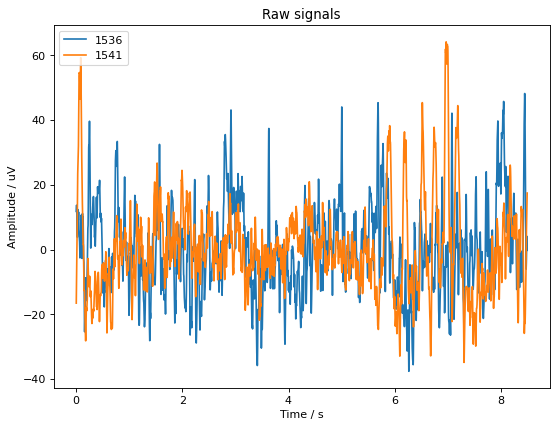

In [5]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,4352/512,1/512)
plt.plot(time_v1, X[2,:],label="1536")
plt.plot(time_v1, X[700],label="1541")
plt.title("Raw signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

In [6]:
n_components = 40

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 40 eigenfaces from 768 faces
PCA projection of the images


In [7]:
y_train = column_or_1d(np.ravel(y_train), warn=True)
y_test = column_or_1d(np.ravel(y_test), warn=True)

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

Fitting the classifier to the training set


In [8]:
target_names=np.array(['1536', '1541'])
n_classes=2


y_pred_svm = svm.predict(X_test_pca)
print('SUPPORT VECTOR MACHINE')
print("\n")
print(classification_report(y_test, y_pred_svm, target_names=np.array(['1536', '1541'])))
print(confusion_matrix(y_test, y_pred_svm, labels=(1536,1541)))
print("\n")
acc=accuracy_score(y_test,y_pred_svm)*100
print("SVV accuracy: {:.3f}%".format(acc))

SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.59      0.72      0.65        86
        1541       0.72      0.59      0.65       106

    accuracy                           0.65       192
   macro avg       0.66      0.66      0.65       192
weighted avg       0.66      0.65      0.65       192

[[62 24]
 [43 63]]


SVV accuracy: 65.104%


In [9]:
print('LINEAR DISCRIMINANT ANALYSIS')
print("\n")
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda, target_names=target_names))
print(confusion_matrix(y_test, y_pred_lda, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_lda)*100
print("\n")
print("LDA accuracy: {:.3f}%".format(acc))

LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.57      0.67      0.62        86
        1541       0.69      0.58      0.63       106

    accuracy                           0.62       192
   macro avg       0.63      0.63      0.62       192
weighted avg       0.64      0.62      0.63       192

[[58 28]
 [44 62]]


LDA accuracy: 62.500%


In [10]:
print('DECISSION TREES')
print("\n")
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(confusion_matrix(y_test, y_pred_dt, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_dt)*100
print("\n")
print("DT accuracy: {:.3f}%".format(acc))

DECISSION TREES


              precision    recall  f1-score   support

        1536       0.52      0.55      0.53        86
        1541       0.62      0.59      0.61       106

    accuracy                           0.57       192
   macro avg       0.57      0.57      0.57       192
weighted avg       0.57      0.57      0.57       192

[[47 39]
 [43 63]]


DT accuracy: 57.292%


In [11]:
print('ARTIFICIAL NEURAL NETWORK')
print("\n")
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,))
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print(classification_report(y_test, y_pred_ann, target_names=target_names))
print(confusion_matrix(y_test, y_pred_ann, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_ann)*100
print("\n")
print("ANN accuracy: {:.3f}%".format(acc))

ARTIFICIAL NEURAL NETWORK


              precision    recall  f1-score   support

        1536       0.56      0.56      0.56        86
        1541       0.64      0.64      0.64       106

    accuracy                           0.60       192
   macro avg       0.60      0.60      0.60       192
weighted avg       0.60      0.60      0.60       192

[[48 38]
 [38 68]]


ANN accuracy: 60.417%


### D1 mean analysis (160 trials per channel)

In [28]:
X1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/X_D1_mtr.mat')
X1=X1['X_mean']
Y1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/Y_mtr.mat')
Y1 =Y1['Y_mean']

X=X1[30,:,:]
Y_mean=Y1.T

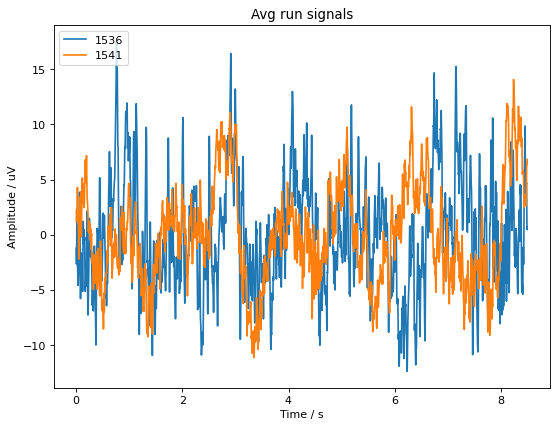

In [90]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,4352/512,1/512)
plt.plot(time_v1, X[1,:],label="1536")
plt.plot(time_v1, X[158,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y_mean, test_size=0.4, random_state=42)

In [92]:
n_components = 50

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 50 eigenfaces from 96 faces
PCA projection of the images


In [93]:
y_train = column_or_1d(np.ravel(y_train), warn=True)
y_test = column_or_1d(np.ravel(y_test), warn=True)

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

Fitting the classifier to the training set


In [94]:
target_names=np.array(['1536', '1541'])
n_classes=2


y_pred_svm = svm.predict(X_test_pca)
print('SUPPORT VECTOR MACHINE')
print("\n")
print(classification_report(y_test, y_pred_svm, target_names=np.array(['1536', '1541'])))
print(confusion_matrix(y_test, y_pred_svm, labels=(1536,1541)))
print("\n")
acc=accuracy_score(y_test,y_pred_svm)*100
print("SVV accuracy: {:.3f}%".format(acc))

SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.75      0.82      0.78        33
        1541       0.79      0.71      0.75        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64

[[27  6]
 [ 9 22]]


SVV accuracy: 76.562%


In [95]:
print('LINEAR DISCRIMINANT ANALYSIS')
print("\n")
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda, target_names=target_names))
print(confusion_matrix(y_test, y_pred_lda, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_lda)*100
print("\n")
print("LDA accuracy: {:.3f}%".format(acc))

LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.75      0.82      0.78        33
        1541       0.79      0.71      0.75        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64

[[27  6]
 [ 9 22]]


LDA accuracy: 76.562%


In [96]:
print('DECISSION TREES')
print("\n")
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(confusion_matrix(y_test, y_pred_dt, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_dt)*100
print("\n")
print("DT accuracy: {:.3f}%".format(acc))

DECISSION TREES


              precision    recall  f1-score   support

        1536       0.76      0.76      0.76        33
        1541       0.74      0.74      0.74        31

    accuracy                           0.75        64
   macro avg       0.75      0.75      0.75        64
weighted avg       0.75      0.75      0.75        64

[[25  8]
 [ 8 23]]


DT accuracy: 75.000%


In [100]:
print('ARTIFICIAL NEURAL NETWORK')
print("\n")
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,))
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print(classification_report(y_test, y_pred_ann, target_names=target_names))
print(confusion_matrix(y_test, y_pred_ann, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_ann)*100
print("\n")
print("ANN accuracy: {:.3f}%".format(acc))

ARTIFICIAL NEURAL NETWORK


              precision    recall  f1-score   support

        1536       0.72      0.79      0.75        33
        1541       0.75      0.68      0.71        31

    accuracy                           0.73        64
   macro avg       0.74      0.73      0.73        64
weighted avg       0.74      0.73      0.73        64

[[26  7]
 [10 21]]


ANN accuracy: 73.438%


### D2 Whole trial analysis (960 signals per channel)

In [15]:
X1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/X_D2.mat')
X1=X1['X2']
X=X1[29,:,:]

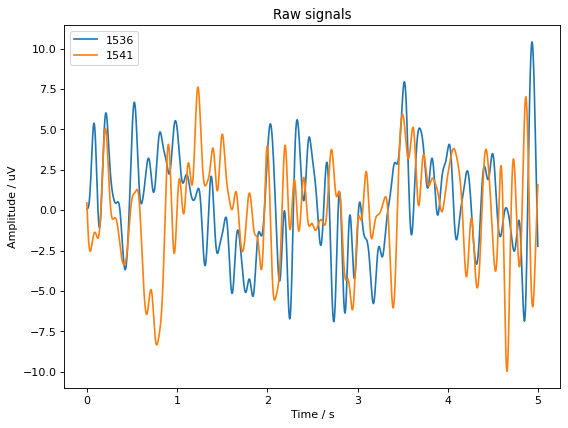

In [8]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,2560/512,1/512)
plt.plot(time_v1, X[1,:],label="1536")
plt.plot(time_v1, X[758,:],label="1541")
plt.title("Raw signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42)

In [17]:
n_components = 40

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 40 eigenfaces from 576 faces
PCA projection of the images


In [18]:
y_train = column_or_1d(np.ravel(y_train), warn=True)
y_test = column_or_1d(np.ravel(y_test), warn=True)

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

Fitting the classifier to the training set


In [19]:
target_names=np.array(['1536', '1541'])
n_classes=2


y_pred_svm = svm.predict(X_test_pca)
print('SUPPORT VECTOR MACHINE')
print("\n")
print(classification_report(y_test, y_pred_svm, target_names=np.array(['1536', '1541'])))
print(confusion_matrix(y_test, y_pred_svm, labels=(1536,1541)))
print("\n")
acc=accuracy_score(y_test,y_pred_svm)*100
print("SVV accuracy: {:.3f}%".format(acc))

SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.72      0.68      0.70       198
        1541       0.68      0.72      0.70       186

    accuracy                           0.70       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.70      0.70      0.70       384

[[134  64]
 [ 52 134]]


SVV accuracy: 69.792%


In [20]:
print('LINEAR DISCRIMINANT ANALYSIS')
print("\n")
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda, target_names=target_names))
print(confusion_matrix(y_test, y_pred_lda, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_lda)*100
print("\n")
print("LDA accuracy: {:.3f}%".format(acc))

LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.75      0.67      0.70       198
        1541       0.68      0.76      0.72       186

    accuracy                           0.71       384
   macro avg       0.71      0.71      0.71       384
weighted avg       0.71      0.71      0.71       384

[[132  66]
 [ 45 141]]


LDA accuracy: 71.094%


In [21]:
print('DECISSION TREES')
print("\n")
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(confusion_matrix(y_test, y_pred_dt, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_dt)*100
print("\n")
print("DT accuracy: {:.3f}%".format(acc))

DECISSION TREES


              precision    recall  f1-score   support

        1536       0.65      0.60      0.62       198
        1541       0.61      0.66      0.63       186

    accuracy                           0.63       384
   macro avg       0.63      0.63      0.63       384
weighted avg       0.63      0.63      0.63       384

[[118  80]
 [ 63 123]]


DT accuracy: 62.760%


In [25]:
print('ARTIFICIAL NEURAL NETWORK')
print("\n")
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,))
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print(classification_report(y_test, y_pred_ann, target_names=target_names))
print(confusion_matrix(y_test, y_pred_ann, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_ann)*100
print("\n")
print("ANN accuracy: {:.3f}%".format(acc))

ARTIFICIAL NEURAL NETWORK


              precision    recall  f1-score   support

        1536       0.63      0.59      0.61       198
        1541       0.59      0.64      0.61       186

    accuracy                           0.61       384
   macro avg       0.61      0.61      0.61       384
weighted avg       0.61      0.61      0.61       384

[[116  82]
 [ 67 119]]


ANN accuracy: 61.198%


### D2  mean analysis (160 trials per channel)

In [29]:
X1 = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/X_D2_mtr.mat')
X1=X1['X2_mean']
X=X1[29,:,:]


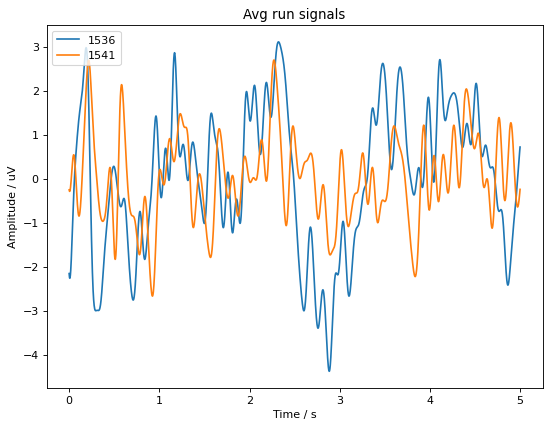

In [11]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,2560/512,1/512)
plt.plot(time_v1, X[1,:],label="1536")
plt.plot(time_v1, X[158,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y_mean, test_size=0.4, random_state=42)

In [31]:
n_components = 50

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 50 eigenfaces from 96 faces
PCA projection of the images


In [32]:
y_train = column_or_1d(np.ravel(y_train), warn=True)
y_test = column_or_1d(np.ravel(y_test), warn=True)

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

Fitting the classifier to the training set


In [33]:
target_names=np.array(['1536', '1541'])
n_classes=2


y_pred_svm = svm.predict(X_test_pca)
print('SUPPORT VECTOR MACHINE')
print("\n")
print(classification_report(y_test, y_pred_svm, target_names=np.array(['1536', '1541'])))
print(confusion_matrix(y_test, y_pred_svm, labels=(1536,1541)))
print("\n")
acc=accuracy_score(y_test,y_pred_svm)*100
print("SVV accuracy: {:.3f}%".format(acc))

SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.81      0.79      0.80        33
        1541       0.78      0.81      0.79        31

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

[[26  7]
 [ 6 25]]


SVV accuracy: 79.688%


In [34]:
print('LINEAR DISCRIMINANT ANALYSIS')
print("\n")
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda, target_names=target_names))
print(confusion_matrix(y_test, y_pred_lda, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_lda)*100
print("\n")
print("LDA accuracy: {:.3f}%".format(acc))

LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.79      0.79      0.79        33
        1541       0.77      0.77      0.77        31

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64

[[26  7]
 [ 7 24]]


LDA accuracy: 78.125%


In [35]:
print('DECISSION TREES')
print("\n")
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(confusion_matrix(y_test, y_pred_dt, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_dt)*100
print("\n")
print("DT accuracy: {:.3f}%".format(acc))

DECISSION TREES


              precision    recall  f1-score   support

        1536       0.78      0.76      0.77        33
        1541       0.75      0.77      0.76        31

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77      0.77      0.77        64

[[25  8]
 [ 7 24]]


DT accuracy: 76.562%


In [36]:
print('ARTIFICIAL NEURAL NETWORK')
print("\n")
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,))
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print(classification_report(y_test, y_pred_ann, target_names=target_names))
print(confusion_matrix(y_test, y_pred_ann, labels=(1536,1541)))
acc=accuracy_score(y_test,y_pred_ann)*100
print("\n")
print("ANN accuracy: {:.3f}%".format(acc))

ARTIFICIAL NEURAL NETWORK


              precision    recall  f1-score   support

        1536       0.81      0.79      0.80        33
        1541       0.78      0.81      0.79        31

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

[[26  7]
 [ 6 25]]


ANN accuracy: 79.688%


## With ICA

In [182]:
def ClassificationReport (data_folderr,X_vector,Y_vector,test_sizee,n_componentss,ANN_layers,keyX,keyÝ):
    X1 = scipy.io.loadmat(data_folderr+X_vector)
    X1=X1[keyX]
    Y1 = scipy.io.loadmat(data_folderr+Y_vector)
    Y1 =Y1[keyÝ]

    X=X1[29,:,:]
    Y=Y1.T
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=test_sizee, random_state=42)
    n_components = n_componentss

    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components, X_train.shape[0]))
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    y_train = column_or_1d(np.ravel(y_train), warn=True)
    y_test = column_or_1d(np.ravel(y_test), warn=True)
    
    print("\n")
    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    svm = svm.fit(X_train_pca, y_train)
    
    target_names=np.array(['1536', '1541'])
    n_classes=2


    y_pred_svm = svm.predict(X_test_pca)
    print("\n")
    print('SUPPORT VECTOR MACHINE')
    print("\n")
    print(classification_report(y_test, y_pred_svm, target_names=np.array(['1536', '1541'])))
    print(confusion_matrix(y_test, y_pred_svm, labels=(1536,1541)))
    print("\n")
    acc=accuracy_score(y_test,y_pred_svm)*100
    print("SVV accuracy: {:.3f}%".format(acc))
    print("\n")
    print('LINEAR DISCRIMINANT ANALYSIS')
    print("\n")
    lda = LinearDiscriminantAnalysis()
    lda = lda.fit(X_train_pca, y_train)
    y_pred_lda = lda.predict(X_test_pca)
    print(classification_report(y_test, y_pred_lda, target_names=target_names))
    print(confusion_matrix(y_test, y_pred_lda, labels=(1536,1541)))
    acc=accuracy_score(y_test,y_pred_lda)*100
    print("\n")
    print("LDA accuracy: {:.3f}%".format(acc))
    print("\n")
    print('DECISSION TREES')
    print("\n")
    dt = DecisionTreeClassifier()
    dt = dt.fit(X_train_pca, y_train)
    y_pred_dt = dt.predict(X_test_pca)
    print(classification_report(y_test, y_pred_dt, target_names=target_names))
    print(confusion_matrix(y_test, y_pred_dt, labels=(1536,1541)))
    acc=accuracy_score(y_test,y_pred_dt)*100
    print("\n")
    print("DT accuracy: {:.3f}%".format(acc))
    print("\n")
    print('ARTIFICIAL NEURAL NETWORK')
    print("\n")
    ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(ANN_layers,))
    ann.fit(X_train_pca, y_train)
    y_pred_ann = ann.predict(X_test_pca)
    print(classification_report(y_test, y_pred_ann, target_names=target_names))
    print(confusion_matrix(y_test, y_pred_ann, labels=(1536,1541)))
    acc=accuracy_score(y_test,y_pred_ann)*100
    print("\n")
    print("ANN accuracy: {:.3f}%".format(acc))
    
    return X
    

### D1 Whole trial analysis (960 signals per channel)

In [187]:
X_D1_ICA = ClassificationReport (data_folder,'X_D1_ICA.mat','Y.mat',0.4,40,15,'X','Y')

Extracting the top 40 eigenfaces from 576 faces


Fitting the classifier to the training set


SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.64      0.68      0.66       198
        1541       0.63      0.60      0.61       186

    accuracy                           0.64       384
   macro avg       0.64      0.64      0.64       384
weighted avg       0.64      0.64      0.64       384

[[134  64]
 [ 75 111]]


SVV accuracy: 63.802%


LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.63      0.63      0.63       198
        1541       0.61      0.61      0.61       186

    accuracy                           0.62       384
   macro avg       0.62      0.62      0.62       384
weighted avg       0.62      0.62      0.62       384

[[125  73]
 [ 73 113]]


LDA accuracy: 61.979%


DECISSION TREES


              precision    recall  f1-score   support

        1536       0.62 

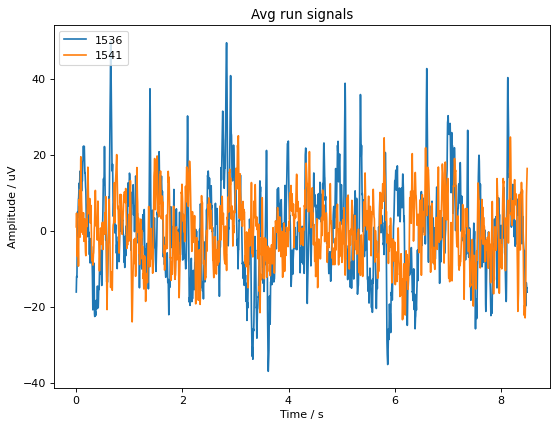

In [188]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,4352/512,1/512)
plt.plot(time_v1, X_D1_ICA[1,:],label="1536")
plt.plot(time_v1, X_D1_ICA[700,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

### D1 mean analysis (160 trials per channel)

In [189]:
X_D1mtr_ICA = ClassificationReport (data_folder,'X_D1_mtr_ICA.mat','Y_mtr.mat',0.4,40,15,'X_mean','Y_mean')

Extracting the top 40 eigenfaces from 96 faces


Fitting the classifier to the training set


SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.67      0.73      0.70        33
        1541       0.68      0.61      0.64        31

    accuracy                           0.67        64
   macro avg       0.67      0.67      0.67        64
weighted avg       0.67      0.67      0.67        64

[[24  9]
 [12 19]]


SVV accuracy: 67.188%


LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.75      0.73      0.74        33
        1541       0.72      0.74      0.73        31

    accuracy                           0.73        64
   macro avg       0.73      0.73      0.73        64
weighted avg       0.73      0.73      0.73        64

[[24  9]
 [ 8 23]]


LDA accuracy: 73.438%


DECISSION TREES


              precision    recall  f1-score   support

        1536       0.65      0.73

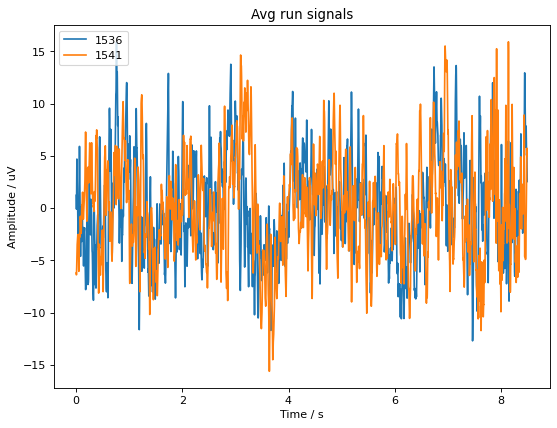

In [191]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,4352/512,1/512)
plt.plot(time_v1, X_D1mtr_ICA[1,:],label="1536")
plt.plot(time_v1, X_D1mtr_ICA[140,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

### D2 Whole trial analysis (960 signals per channel)

In [199]:
X_D2_ICA = ClassificationReport (data_folder,'X_D2_ICA.mat','Y.mat',0.4,40,15,'X2','Y')

Extracting the top 40 eigenfaces from 576 faces


Fitting the classifier to the training set


SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.69      0.63      0.66       198
        1541       0.64      0.70      0.67       186

    accuracy                           0.66       384
   macro avg       0.67      0.67      0.66       384
weighted avg       0.67      0.66      0.66       384

[[125  73]
 [ 56 130]]


SVV accuracy: 66.406%


LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.71      0.63      0.66       198
        1541       0.65      0.73      0.68       186

    accuracy                           0.67       384
   macro avg       0.68      0.68      0.67       384
weighted avg       0.68      0.67      0.67       384

[[124  74]
 [ 51 135]]


LDA accuracy: 67.448%


DECISSION TREES


              precision    recall  f1-score   support

        1536       0.63 

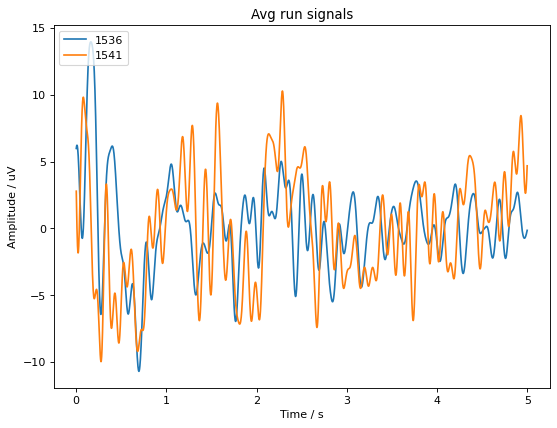

In [202]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,2560/512,1/512)
plt.plot(time_v1, X_D2_ICA[3,:],label="1536")
plt.plot(time_v1, X_D2_ICA[650,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

### D2  mean analysis (160 trials per channel)

In [196]:
X_D2mtr_ICA = ClassificationReport (data_folder,'X_D2_mtr_ICA.mat','Y_mtr.mat',0.4,40,15,'X2_mean','Y_mean')

Extracting the top 40 eigenfaces from 96 faces


Fitting the classifier to the training set


SUPPORT VECTOR MACHINE


              precision    recall  f1-score   support

        1536       0.77      0.82      0.79        33
        1541       0.79      0.74      0.77        31

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64

[[27  6]
 [ 8 23]]


SVV accuracy: 78.125%


LINEAR DISCRIMINANT ANALYSIS


              precision    recall  f1-score   support

        1536       0.71      0.76      0.74        33
        1541       0.72      0.68      0.70        31

    accuracy                           0.72        64
   macro avg       0.72      0.72      0.72        64
weighted avg       0.72      0.72      0.72        64

[[25  8]
 [10 21]]


LDA accuracy: 71.875%


DECISSION TREES


              precision    recall  f1-score   support

        1536       0.71      0.76

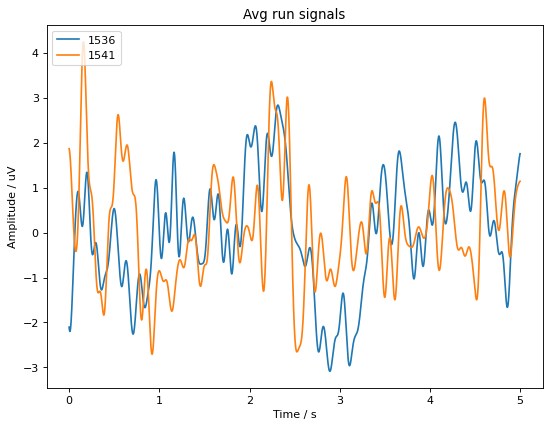

In [198]:
figure(figsize=(8, 6), dpi=80)
time_v1=np.arange(0,2560/512,1/512)
plt.plot(time_v1, X_D2mtr_ICA[1,:],label="1536")
plt.plot(time_v1, X_D2mtr_ICA[150,:],label="1541")
plt.title("Avg run signals") 
plt.xlabel("Time / s") 
plt.ylabel("Amplitude / uV") 
plt.legend(loc="upper left");

# Classification with Features

## Without ICA

### Whole trial analysis (960 features per channel)

In [124]:
#feature_names = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/features_names.mat')
#feature_names = scipy.io.loadmat('/Users/juliagarciacornet/Desktop/Q4/Dades/Project/features_names.mat')
feature_names = scipy.io.loadmat('/Users/lgsob/OneDrive/Escritorio/ETSEIB-UPC/MÁSTER NEURO/Q2/ANÁLISIS DE DATOS/PROJECT/features_names.mat')
feature_names=feature_names['features_names']

#features= scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/features.mat')
#features= scipy.io.loadmat('/Users/juliagarciacornet/Desktop/Q4/Dades/Project/features.mat')
features= scipy.io.loadmat('/Users/lgsob/OneDrive/Escritorio/ETSEIB-UPC/MÁSTER NEURO/Q2/ANÁLISIS DE DATOS/PROJECT/features.mat')
features=features['features']
df1 = pd.DataFrame(features)


#### Tables with the information

In [152]:
for count, i in enumerate(feature_names):
    ii= np.char.strip(i)
    df1 = df1.rename(columns={count: str(ii)})
df1['Identifier'] = df1['Identifier'].astype(str)    
df1

,Identifier,D1Peak1218,D1Latency1218,D1Peak1620,D1Latency1620,D1Peak2730,D1Latency2730,D1Peak3035,D1Latency3035,D1Spectrogram,D2Peak1012,D2Latency1012,D2Peak1316,D2Latency1316,D2Peak2325
0,1536.0,43.370952,282.0,31.140255,138.0,29.765484,99.0,23.931569,177.0,544.813583,11.277353,114.0,7.806661,301.0,4.102483
1,1536.0,49.099950,252.0,35.867095,106.0,34.112445,44.0,42.226684,384.0,695.835665,5.596455,195.0,6.901165,103.0,3.502756
2,1536.0,43.112695,295.0,37.391135,260.0,45.351585,214.0,21.975810,10.0,1098.711451,12.347032,49.0,8.655596,104.0,6.067068
3,1536.0,43.448349,430.0,43.448349,30.0,19.191983,252.0,31.288637,399.0,847.929198,5.142363,165.0,5.219272,156.0,2.035192
4,1536.0,35.272541,18.0,35.653847,255.0,32.242017,243.0,18.133954,232.0,752.067375,4.430369,1.0,6.617610,133.0,6.559354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1541.0,21.537568,426.0,31.227666,392.0,35.039018,44.0,21.359161,362.0,1045.401499,6.967395,251.0,3.945030,81.0,6.657756
956,1541.0,8.310315,348.0,6.566225,6.0,6.079210,156.0,7.872390,167.0,433.351035,2.317253,250.0,2.567308,160.0,0.842575
957,1541.0,22.591910,358.0,19.324083,190.0,27.645338,293.0,25.857988,1.0,747.106991,3.747037,251.0,7.081823,180.0,-0.991813
958,1541.0,16.324014,268.0,15.642560,110.0,32.170703,203.0,26.503473,22.0,1371.221694,5.609337,128.0,4.369216,33.0,1.897709


In [5]:
# Descriptive statistics 1536
statistics_1536 = df1[df1['Identifier'] == '1536.0'].describe()
statistics_1536.rename(columns=lambda x: x + '_1536', inplace=True)
statistics_1536

,D1Peak1218_1536,D1Latency1218_1536,D1Peak1620_1536,D1Latency1620_1536,D1Peak2730_1536,D1Latency2730_1536,D1Peak3035_1536,D1Latency3035_1536,D1Spectrogram_1536,D2Peak1012_1536,D2Latency1012_1536,D2Peak1316_1536,D2Latency1316_1536,D2Peak2325_1536
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,34.283234,302.554167,30.593265,180.650000,28.758204,172.547917,37.539705,229.212500,776.898489,8.444869,140.025000,8.628148,160.462500,5.984958
std,11.423353,121.143530,10.331883,116.346947,11.362211,90.000776,18.456142,152.147634,514.569320,3.450520,68.172685,3.181941,85.973819,3.109170
min,11.231881,1.000000,6.938418,1.000000,2.724012,1.000000,3.598248,1.000000,120.991894,1.215983,1.000000,3.409564,1.000000,-0.288470
25%,27.223735,236.000000,24.626916,75.500000,22.537259,95.500000,23.920562,86.000000,432.541469,5.991677,90.000000,6.574255,88.750000,3.644569
50%,33.587673,320.500000,30.045610,192.000000,27.249773,180.500000,36.041520,216.000000,643.722985,8.251895,147.000000,8.300065,173.000000,5.903781
75%,40.213453,378.250000,35.658013,262.250000,34.563680,255.000000,49.253255,357.000000,1000.001894,10.238167,190.000000,10.311065,230.500000,7.881535
max,88.604225,598.000000,74.624742,401.000000,104.797950,301.000000,96.720988,501.000000,3524.103216,28.180740,251.000000,27.540044,301.000000,17.798388


In [6]:
# Descriptive statistics 1541
statistics_1541 = df1[df1['Identifier'] == '1541.0'].describe()
statistics_1541.rename(columns=lambda x: x + '_1541', inplace=True)
statistics_1541

,D1Peak1218_1541,D1Latency1218_1541,D1Peak1620_1541,D1Latency1620_1541,D1Peak2730_1541,D1Latency2730_1541,D1Peak3035_1541,D1Latency3035_1541,D1Spectrogram_1541,D2Peak1012_1541,D2Latency1012_1541,D2Peak1316_1541,D2Latency1316_1541,D2Peak2325_1541
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,32.471671,334.122917,30.720803,160.775000,29.578724,168.106250,41.897147,242.233333,881.501907,7.286947,158.881250,7.553069,142.893750,5.180742
std,11.208846,134.683932,11.289817,117.710179,11.078660,92.475755,18.796427,142.528713,548.828043,3.111750,74.516706,2.937427,82.190618,3.509372
min,8.310315,1.000000,6.566225,1.000000,6.079210,1.000000,7.872390,1.000000,105.663784,-1.570405,1.000000,2.567308,1.000000,-3.218876
25%,26.098496,261.000000,24.233802,56.000000,22.710668,97.000000,29.008728,138.250000,449.297099,5.238238,107.750000,5.528397,76.000000,2.867301
50%,32.086164,348.000000,29.695673,142.500000,28.664083,163.500000,41.106607,239.000000,738.035931,7.132928,161.000000,7.148597,152.000000,4.821298
75%,38.620860,422.250000,35.926196,251.000000,35.363961,256.000000,54.413055,361.250000,1163.037101,9.160129,231.000000,9.384683,202.500000,6.917126
max,81.811672,601.000000,78.839485,401.000000,73.939800,301.000000,110.429891,501.000000,3295.020654,17.572984,251.000000,19.625291,301.000000,35.813519


#### Histoplots

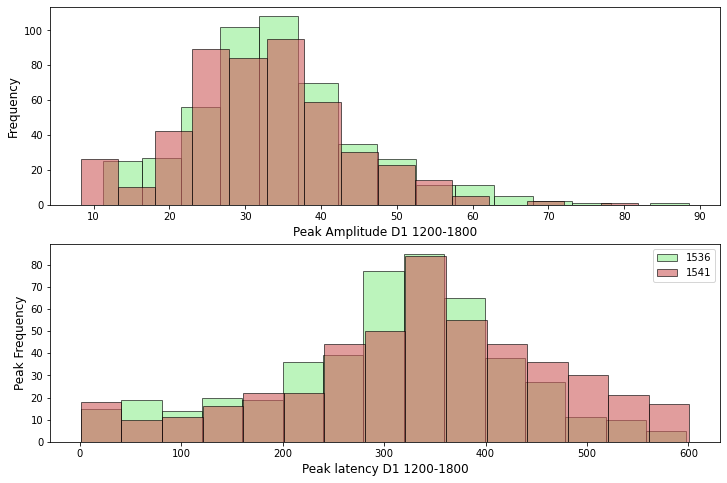

In [6]:
def HistoPlot_D11218 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 1200-1800', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 1200-1800', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D11218 ()

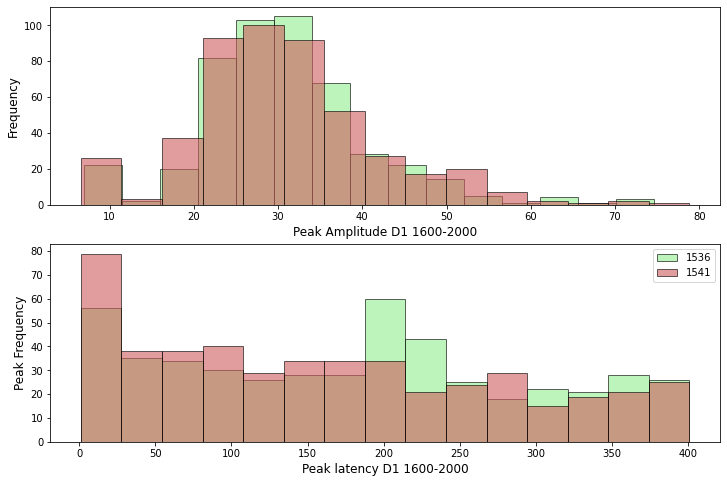

In [7]:
def HistoPlot_D1_1620 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D1Peak1620.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D1Peak1620.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 1600-2000', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D1Latency1620.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D1Latency1620.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 1600-2000', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_1620 ()

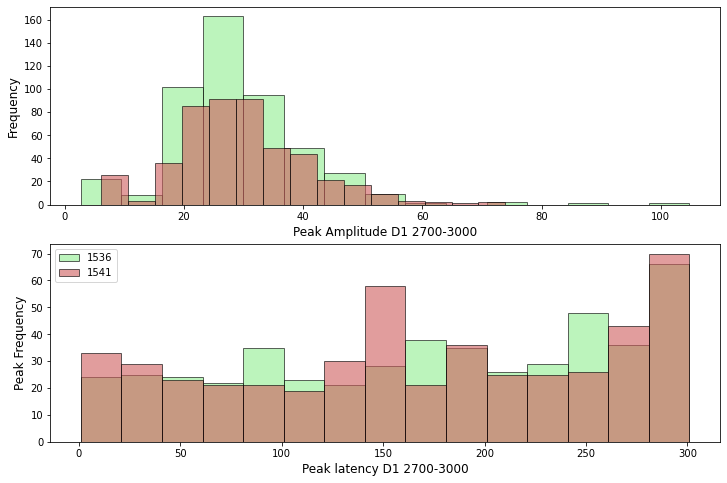

In [8]:
def HistoPlot_D1_2730 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D1Peak2730.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D1Peak2730.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 2700-3000', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D1Latency2730.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D1Latency2730.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 2700-3000', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_2730 ()

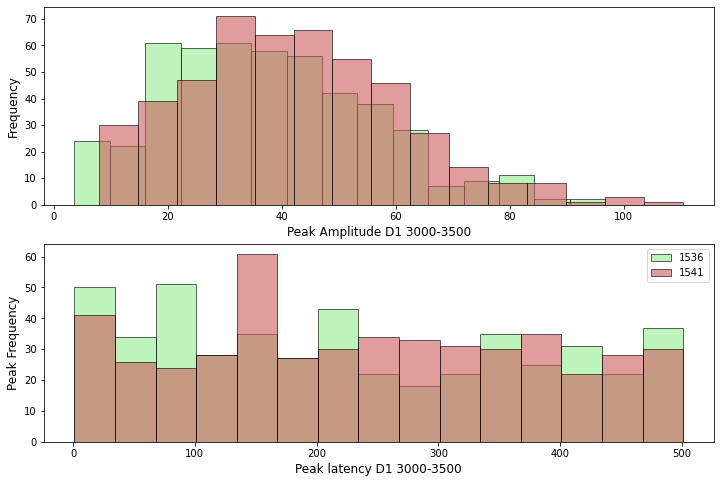

In [9]:
def HistoPlot_D1_3035 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D1Peak3035.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D1Peak3035.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 3000-3500', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D1Latency3035.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D1Latency3035.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 3000-3500', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_3035 ()

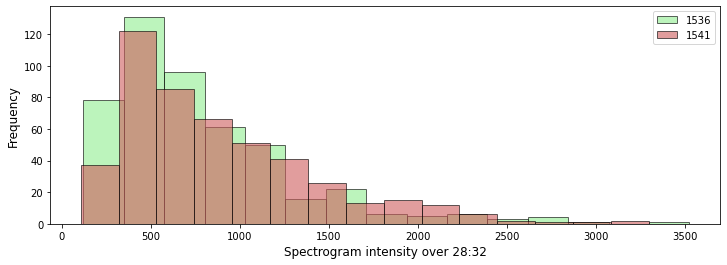

In [10]:
def Spectro ():
    
    fig2, ax21 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

    df1[df1["Identifier"] == '1536.0'].D1Spectrogram.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D1Spectrogram.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Spectrogram intensity over 28:32', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    ax21.legend(labels=['1536', '1541'])
 
Spectro ()

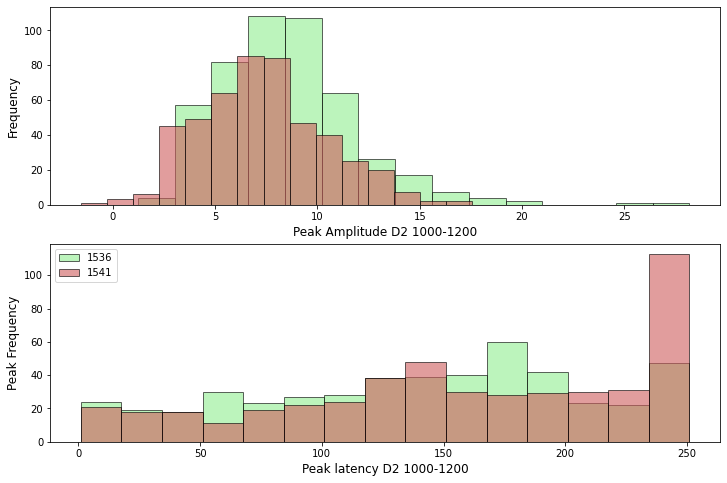

In [11]:
def HistoPlot_D2_1012 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D2Peak1012.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D2Peak1012.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 1000-1200', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D2Latency1012.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D2Latency1012.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D2 1000-1200', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D2_1012 ()

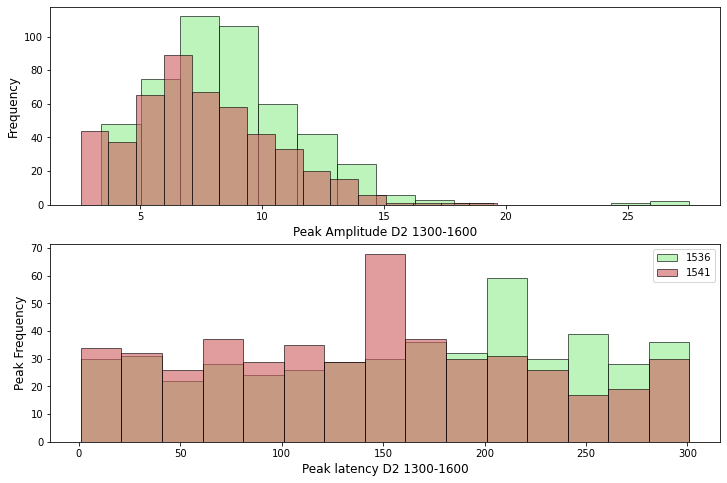

In [12]:
def HistoPlot_D2_1316 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df1[df1["Identifier"] == '1536.0'].D2Peak1316.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D2Peak1316.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 1300-1600', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df1[df1['Identifier'] == '1536.0'].D2Latency1316.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df1[df1['Identifier'] == '1541.0'].D2Latency1316.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D2 1300-1600', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D2_1316 ()

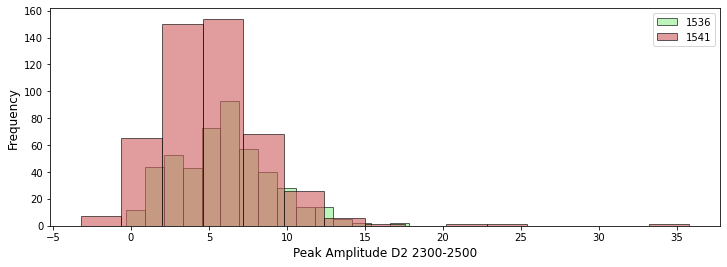

In [158]:
def HistoPlot_D2_2325 ():
    
    fig2, ax21 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

    df1[df1["Identifier"] == '1536.0'].D2Peak2325.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df1[df1["Identifier"] == '1541.0'].D2Peak2325.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 2300-2500', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    ax21.legend(labels=['1536', '1541'])
 
HistoPlot_D2_2325 ()

### Mean trial analysis (160 features per channel)

In [126]:
#features_mean= scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/features_mtr.mat')
#features_mean= scipy.io.loadmat('/Users/juliagarciacornet/Desktop/Q4/Dades/Project/features_mtr.mat')
features_mean = scipy.io.loadmat('/Users/lgsob/OneDrive/Escritorio/ETSEIB-UPC/MÁSTER NEURO/Q2/ANÁLISIS DE DATOS/PROJECT/features_mtr.mat')
features_mean=features_mean['features_mean']
df2 = pd.DataFrame(features_mean)

#### Tables with the information

In [127]:
for count, i in enumerate(feature_names):
    ii= np.char.strip(i)
    df2 = df2.rename(columns={count: str(ii)})
df2['Identifier'] = df2['Identifier'].astype(str)    
df2

,Identifier,D1Peak1218,D1Latency1218,D1Peak1620,D1Latency1620,D1Peak2730,D1Latency2730,D1Peak3035,D1Latency3035,D1Spectrogram,D2Peak1012,D2Latency1012,D2Peak1316,D2Latency1316,D2Peak2325
0,1536.0,24.396851,294.0,14.462709,80.0,11.305972,217.0,6.619511,478.0,449.466082,3.805493,59.0,4.499574,164.0,2.432955
1,1536.0,16.400936,293.0,11.505812,280.0,10.668037,25.0,15.010734,455.0,380.263356,3.116853,190.0,4.381340,178.0,2.171480
2,1536.0,16.446932,336.0,10.336382,313.0,13.953827,193.0,10.054051,318.0,279.264117,6.031595,184.0,4.520682,84.0,0.817555
3,1536.0,19.107138,308.0,20.560448,200.0,12.242981,294.0,13.794544,10.0,195.848066,5.848174,149.0,4.236494,121.0,2.838875
4,1536.0,22.500384,297.0,13.257892,124.0,13.460069,88.0,18.571607,124.0,180.936724,3.822262,249.0,2.822055,256.0,0.787228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1541.0,9.511594,385.0,9.696005,282.0,7.986860,202.0,5.646119,481.0,198.473179,2.535455,198.0,4.002334,1.0,1.380348
156,1541.0,14.237631,319.0,14.178750,387.0,6.578351,164.0,10.847439,303.0,227.661079,3.798437,121.0,4.128708,52.0,1.202733
157,1541.0,7.905918,26.0,15.933722,166.0,12.583769,243.0,22.518150,364.0,837.562468,1.358577,107.0,3.898526,1.0,0.823982
158,1541.0,8.023393,208.0,6.339764,19.0,8.099770,163.0,9.806954,335.0,272.774005,2.703019,164.0,1.731799,183.0,1.392641


In [9]:
# Descriptive statistics 1536
statistics_1536 = df2[df2['Identifier'] == '1536.0'].describe()
statistics_1536.rename(columns=lambda x: x + '_1536', inplace=True)
statistics_1536

,D1Peak1218_1536,D1Latency1218_1536,D1Peak1620_1536,D1Latency1620_1536,D1Peak2730_1536,D1Latency2730_1536,D1Peak3035_1536,D1Latency3035_1536,D1Spectrogram_1536,D2Peak1012_1536,D2Latency1012_1536,D2Peak1316_1536,D2Latency1316_1536,D2Peak2325_1536
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,17.951676,327.400000,15.287053,202.300000,12.806548,189.000000,16.929863,237.962500,450.660353,5.311311,145.000000,5.517254,177.550000,3.236749
std,4.466001,85.239142,3.883537,113.284944,3.722736,88.213923,8.367682,166.211277,258.787402,1.760302,71.734391,1.692112,76.272977,1.410234
min,10.488440,13.000000,9.514186,1.000000,6.980270,2.000000,3.529086,2.000000,106.849053,1.331879,1.000000,2.822055,29.000000,0.781462
25%,14.215758,294.750000,12.794637,98.750000,9.798955,116.500000,10.714380,84.000000,245.001591,4.000832,91.750000,4.304686,117.750000,2.278930
50%,17.345462,324.500000,14.082316,216.500000,12.188885,201.500000,15.910191,212.500000,427.954011,4.969912,151.000000,5.150424,190.500000,3.087125
75%,21.087654,367.000000,16.949188,288.500000,15.422438,261.250000,20.459909,412.000000,600.157792,6.194956,192.000000,6.368764,239.000000,4.221149
max,28.922679,520.000000,25.535401,400.000000,22.754245,301.000000,52.479284,501.000000,1325.944708,10.681279,251.000000,9.619694,301.000000,7.175301


In [10]:
# Descriptive statistics 1541
statistics_1541 = df2[df2['Identifier'] == '1541.0'].describe()
statistics_1541.rename(columns=lambda x: x + '_1541', inplace=True)
statistics_1541

,D1Peak1218_1541,D1Latency1218_1541,D1Peak1620_1541,D1Latency1620_1541,D1Peak2730_1541,D1Latency2730_1541,D1Peak3035_1541,D1Latency3035_1541,D1Spectrogram_1541,D2Peak1012_1541,D2Latency1012_1541,D2Peak1316_1541,D2Latency1316_1541,D2Peak2325_1541
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,16.151968,348.212500,14.329716,140.250000,13.798281,154.425000,20.176854,250.662500,566.985578,4.170876,168.850000,4.242379,141.087500,2.545526
std,4.228317,88.482523,3.684093,118.458079,4.452077,85.096189,9.136344,142.251511,344.533238,1.425691,71.751346,1.653834,84.536292,1.388257
min,7.905918,26.000000,6.339764,2.000000,6.553076,2.000000,5.646119,2.000000,113.688330,1.358577,1.000000,1.696983,1.000000,-0.266340
25%,13.418822,307.500000,11.503878,27.500000,11.177204,85.000000,13.743232,123.500000,268.497953,3.285638,117.750000,3.124720,82.750000,1.415273
50%,16.176866,350.500000,14.275359,124.000000,12.723667,155.500000,18.553149,245.000000,515.883629,4.026327,164.500000,3.913875,157.000000,2.502952
75%,18.906481,398.500000,16.767561,217.000000,15.497555,208.000000,25.347933,357.750000,763.505776,4.842596,240.250000,5.281001,190.250000,3.389591
max,29.598279,539.000000,23.748777,397.000000,28.224176,301.000000,44.110318,501.000000,1859.422549,8.615175,251.000000,8.166616,301.000000,7.769268


#### Histoplots

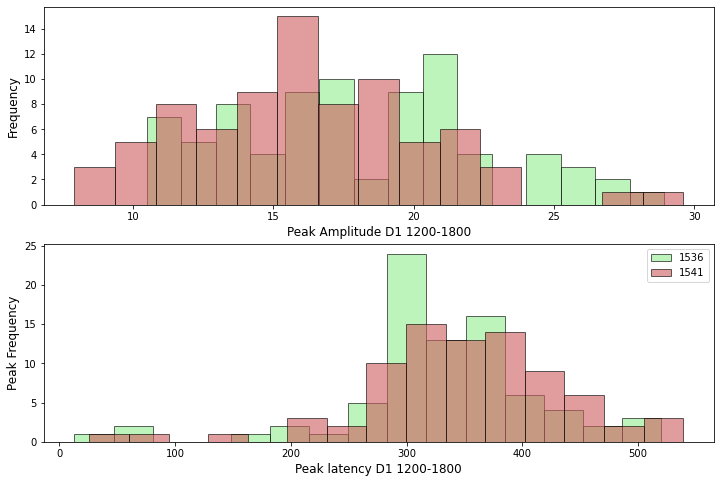

In [165]:
def HistoPlot_D11218 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 1200-1800', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 1200-1800', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D11218 ()

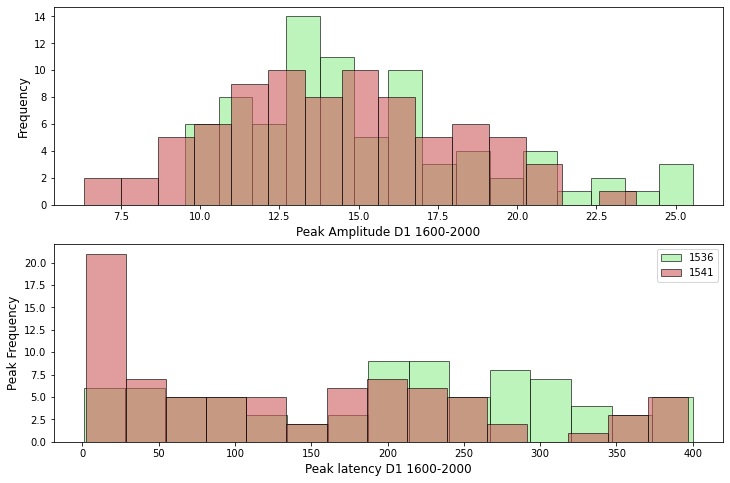

In [166]:
def HistoPlot_D1_1620 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D1Peak1620.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D1Peak1620.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 1600-2000', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D1Latency1620.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D1Latency1620.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 1600-2000', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_1620 ()

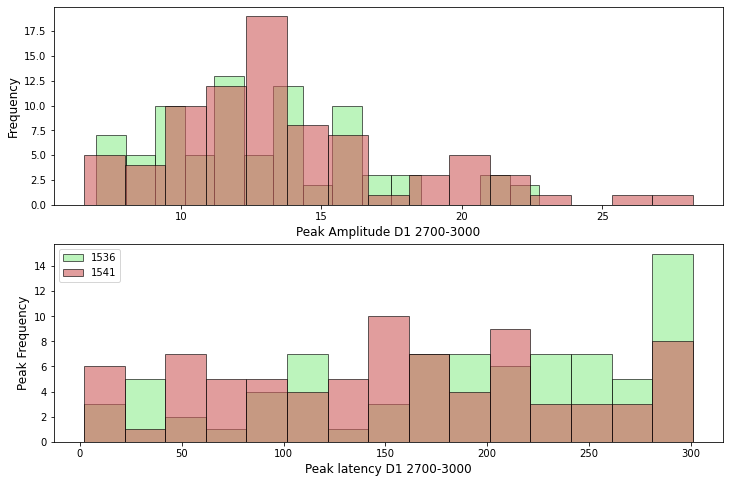

In [167]:
def HistoPlot_D1_2730 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D1Peak2730.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D1Peak2730.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 2700-3000', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D1Latency2730.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D1Latency2730.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 2700-3000', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_2730 ()

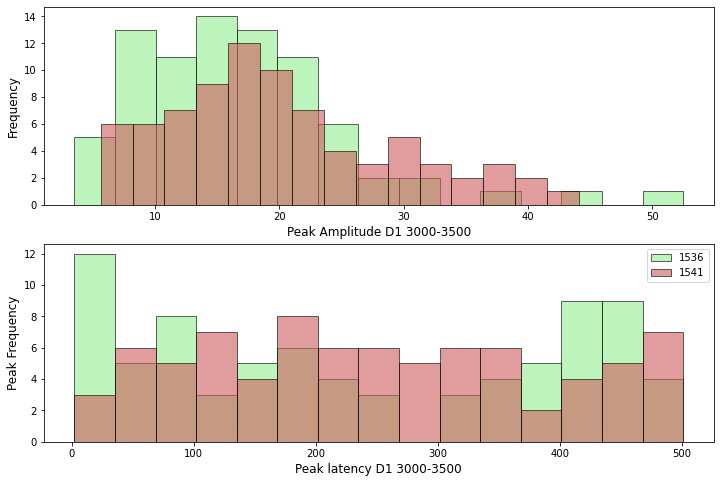

In [168]:
def HistoPlot_D1_3035 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D1Peak3035.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D1Peak3035.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 3000-3500', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D1Latency3035.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D1Latency3035.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 3000-3500', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D1_3035 ()

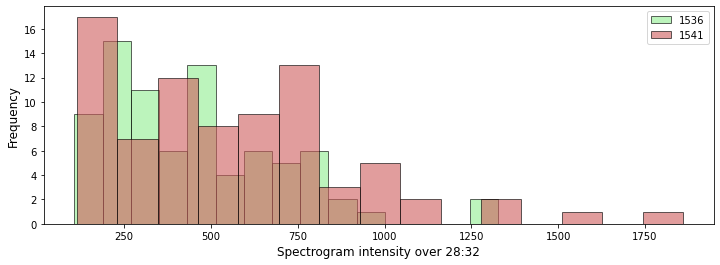

In [169]:
def Spectro ():
    
    fig2, ax21 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

    df2[df2["Identifier"] == '1536.0'].D1Spectrogram.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D1Spectrogram.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Spectrogram intensity over 28:32', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    ax21.legend(labels=['1536', '1541'])
 
Spectro ()

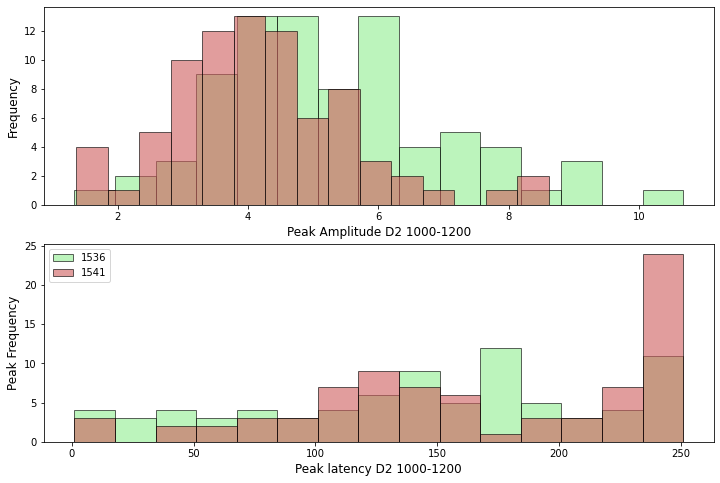

In [170]:
def HistoPlot_D2_1012 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D2Peak1012.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D2Peak1012.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 1000-1200', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D2Latency1012.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D2Latency1012.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D2 1000-1200', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D2_1012 ()

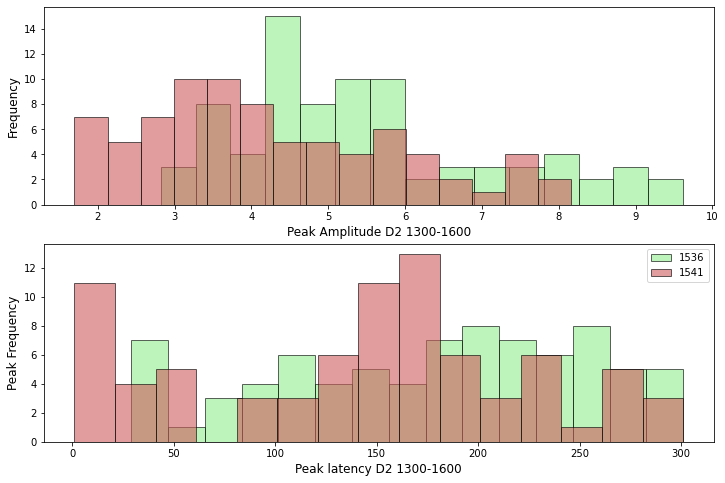

In [171]:
def HistoPlot_D2_1316 ():
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df2[df2["Identifier"] == '1536.0'].D2Peak1316.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D2Peak1316.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 1300-1600', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df2[df2['Identifier'] == '1536.0'].D2Latency1316.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df2[df2['Identifier'] == '1541.0'].D2Latency1316.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D2 1300-1600', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D2_1316 ()

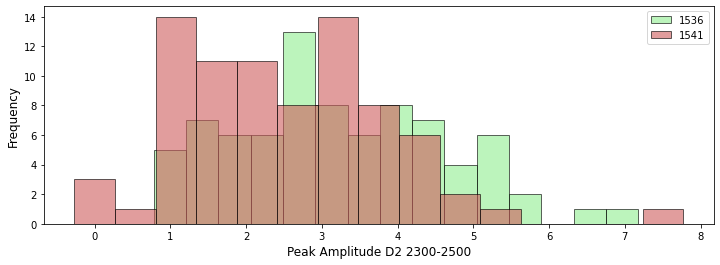

In [172]:
def HistoPlot_D2_2325 ():
    
    fig2, ax21 = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

    df2[df2["Identifier"] == '1536.0'].D2Peak2325.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df2[df2["Identifier"] == '1541.0'].D2Peak2325.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D2 2300-2500', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    ax21.legend(labels=['1536', '1541'])
 
HistoPlot_D2_2325 ()

## With ICA

### Whole trial analysis (960 features per channel)

In [128]:
feature_names = scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/features_names.mat')
feature_names=feature_names['features_names']

features= scipy.io.loadmat('D:/Universidad/Master/Q2/Projecto de dades/features_ICA.mat')
features=features['features']
df3 = pd.DataFrame(features)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Universidad/Master/Q2/Projecto de dades/features_names.mat'

#### Tables with the information

In [23]:
for count, i in enumerate(feature_names):
    ii= np.char.strip(i)
    df3 = df1.rename(columns={count: str(ii)})
df3['Identifier'] = df3['Identifier'].astype(str)    
df3

,Identifier,D1Peak1218,D1Latency1218,D1Peak1620,D1Latency1620,D1Peak2730,D1Latency2730,D1Peak3035,D1Latency3035,D1Spectrogram,D2Peak1012,D2Latency1012,D2Peak1316,D2Latency1316,D2Peak2325
0,1536.0,43.370952,282.0,31.140255,138.0,29.765484,99.0,23.931569,177.0,544.813583,11.277353,114.0,7.806661,301.0,4.102483
1,1536.0,49.099950,252.0,35.867095,106.0,34.112445,44.0,42.226684,384.0,695.835665,5.596455,195.0,6.901165,103.0,3.502756
2,1536.0,43.112695,295.0,37.391135,260.0,45.351585,214.0,21.975810,10.0,1098.711451,12.347032,49.0,8.655596,104.0,6.067068
3,1536.0,43.448349,430.0,43.448349,30.0,19.191983,252.0,31.288637,399.0,847.929198,5.142363,165.0,5.219272,156.0,2.035192
4,1536.0,35.272541,18.0,35.653847,255.0,32.242017,243.0,18.133954,232.0,752.067375,4.430369,1.0,6.617610,133.0,6.559354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1541.0,21.537568,426.0,31.227666,392.0,35.039018,44.0,21.359161,362.0,1045.401499,6.967395,251.0,3.945030,81.0,6.657756
956,1541.0,8.310315,348.0,6.566225,6.0,6.079210,156.0,7.872390,167.0,433.351035,2.317253,250.0,2.567308,160.0,0.842575
957,1541.0,22.591910,358.0,19.324083,190.0,27.645338,293.0,25.857988,1.0,747.106991,3.747037,251.0,7.081823,180.0,-0.991813
958,1541.0,16.324014,268.0,15.642560,110.0,32.170703,203.0,26.503473,22.0,1371.221694,5.609337,128.0,4.369216,33.0,1.897709


In [205]:
# Descriptive statistics 1536
statistics_1536 = df3[df3['Identifier'] == '1536.0'].describe()
statistics_1536.rename(columns=lambda x: x + '_1536', inplace=True)
statistics_1536

,D1Peak1218_1536,D1Latency1218_1536,D1Peak1620_1536,D1Latency1620_1536,D1Peak2730_1536,D1Latency2730_1536,D1Peak3035_1536,D1Latency3035_1536,D1Spectrogram_1536,D2Peak1012_1536,D2Latency1012_1536,D2Peak1316_1536,D2Latency1316_1536,D2Peak2325_1536
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,34.283234,302.554167,30.593265,180.650000,28.758204,172.547917,37.539705,229.212500,776.898489,8.444869,140.025000,8.628148,160.462500,5.984958
std,11.423353,121.143530,10.331883,116.346947,11.362211,90.000776,18.456142,152.147634,514.569320,3.450520,68.172685,3.181941,85.973819,3.109170
min,11.231881,1.000000,6.938418,1.000000,2.724012,1.000000,3.598248,1.000000,120.991894,1.215983,1.000000,3.409564,1.000000,-0.288470
25%,27.223735,236.000000,24.626916,75.500000,22.537259,95.500000,23.920562,86.000000,432.541469,5.991677,90.000000,6.574255,88.750000,3.644569
50%,33.587673,320.500000,30.045610,192.000000,27.249773,180.500000,36.041520,216.000000,643.722985,8.251895,147.000000,8.300065,173.000000,5.903781
75%,40.213453,378.250000,35.658013,262.250000,34.563680,255.000000,49.253255,357.000000,1000.001894,10.238167,190.000000,10.311065,230.500000,7.881535
max,88.604225,598.000000,74.624742,401.000000,104.797950,301.000000,96.720988,501.000000,3524.103216,28.180740,251.000000,27.540044,301.000000,17.798388


In [206]:
# Descriptive statistics 1541
statistics_1541 = df3[df3['Identifier'] == '1541.0'].describe()
statistics_1541.rename(columns=lambda x: x + '_1541', inplace=True)
statistics_1541

,D1Peak1218_1541,D1Latency1218_1541,D1Peak1620_1541,D1Latency1620_1541,D1Peak2730_1541,D1Latency2730_1541,D1Peak3035_1541,D1Latency3035_1541,D1Spectrogram_1541,D2Peak1012_1541,D2Latency1012_1541,D2Peak1316_1541,D2Latency1316_1541,D2Peak2325_1541
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,32.471671,334.122917,30.720803,160.775000,29.578724,168.106250,41.897147,242.233333,881.501907,7.286947,158.881250,7.553069,142.893750,5.180742
std,11.208846,134.683932,11.289817,117.710179,11.078660,92.475755,18.796427,142.528713,548.828043,3.111750,74.516706,2.937427,82.190618,3.509372
min,8.310315,1.000000,6.566225,1.000000,6.079210,1.000000,7.872390,1.000000,105.663784,-1.570405,1.000000,2.567308,1.000000,-3.218876
25%,26.098496,261.000000,24.233802,56.000000,22.710668,97.000000,29.008728,138.250000,449.297099,5.238238,107.750000,5.528397,76.000000,2.867301
50%,32.086164,348.000000,29.695673,142.500000,28.664083,163.500000,41.106607,239.000000,738.035931,7.132928,161.000000,7.148597,152.000000,4.821298
75%,38.620860,422.250000,35.926196,251.000000,35.363961,256.000000,54.413055,361.250000,1163.037101,9.160129,231.000000,9.384683,202.500000,6.917126
max,81.811672,601.000000,78.839485,401.000000,73.939800,301.000000,110.429891,501.000000,3295.020654,17.572984,251.000000,19.625291,301.000000,35.813519


#### Histoplots

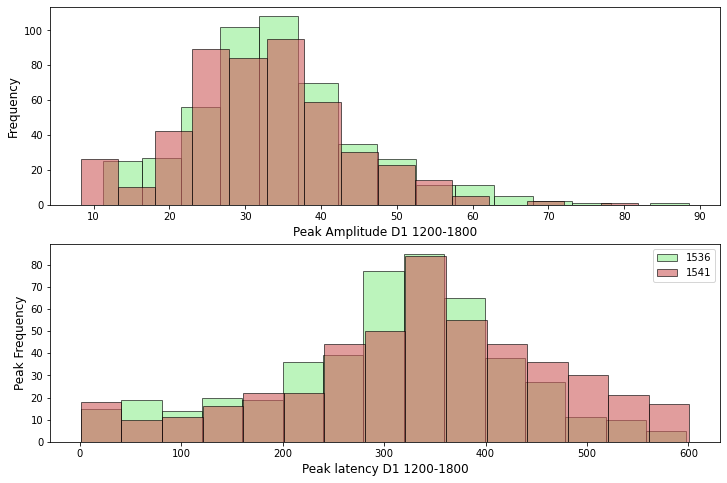

In [210]:
def HistoPlot_D11218 (df):
    
    fig2, (ax21, ax22) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    df[df["Identifier"] == '1536.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax21)
    df[df["Identifier"] == '1541.0'].D1Peak1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax21)

    ax21.set_xlabel('Peak Amplitude D1 1200-1800', size=12)
    ax21.set_ylabel('Frequency', size=12) 
    
    df[df['Identifier'] == '1536.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='lightgreen', edgecolor='black', alpha=0.6, ax=ax22)
    df[df['Identifier'] == '1541.0'].D1Latency1218.plot(
        kind='hist', bins=15, color='indianred', edgecolor='black', alpha=0.6, ax=ax22)

    ax22.legend(labels=['1536', '1541'])
    ax22.set_xlabel('Peak latency D1 1200-1800', size=12)
    ax22.set_ylabel('Peak Frequency', size=12)
    
HistoPlot_D11218 (df3)

# Exploratory data analysis


## Correlation matrix

In [131]:
# Division train/ test
X=df1.drop(['Identifier'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print('train set:', X_train.shape)
print('test set:',y_test.shape)

train set: (768, 14)
test set: (192,)


First, in order to see the correlation that exists between the features, the correlation matrix will be created.

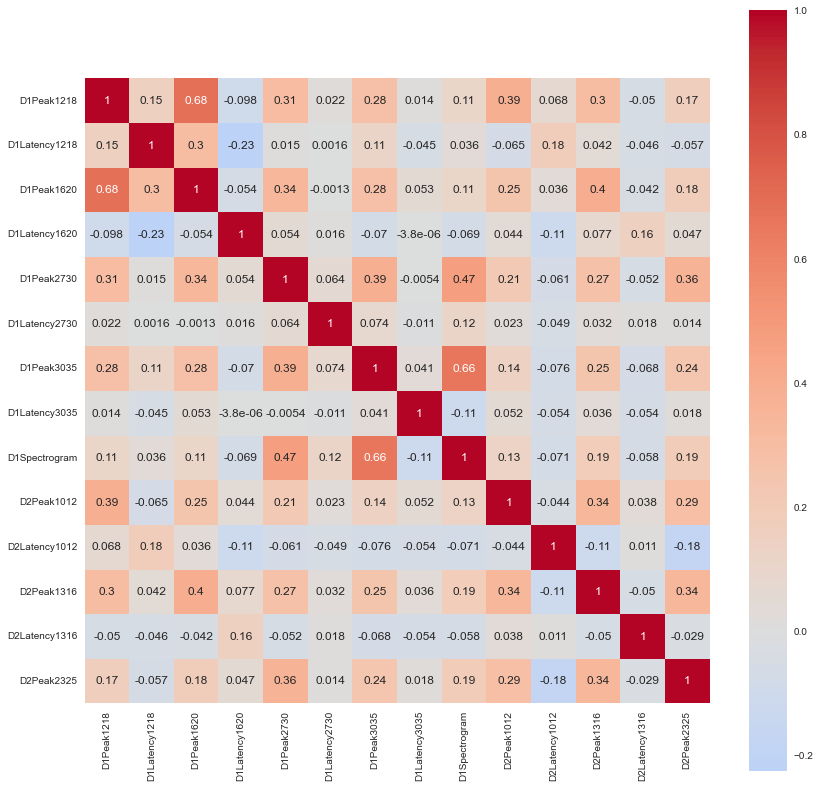

In [133]:
# Build the feature matrices and the response vectors (X, y)
#first create the correlation matrix

corrmatdf1=X_train.corr()
fig=plt.subplots(figsize=(14,14))
matrix=sns.heatmap(corrmatdf1, annot=True, square=True, cmap="coolwarm", center=0);

## LDA

In [135]:
X_train4 = X_train[['D1Latency1218', 'D1Peak1218', 'D1Spectrogram', 'D1Peak3035']]
y_train4 = y_train
X_test4 = X_test[['D1Latency1218', 'D1Peak1218', 'D1Spectrogram', 'D1Peak3035']]
y_test4 = y_test

In [136]:
lda = LinearDiscriminantAnalysis()
y_pred4 = lda.fit(X_train4, y_train4).predict(X_test4)
# Average scores
print("LDA performance on test data\n",
      f"- Accuracy:  {metrics.accuracy_score(y_test4, y_pred4):.4f}\n",
      f"- Precision: {metrics.precision_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- Recall:    {metrics.recall_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- F1 score:  {metrics.f1_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      )

LDA performance on test data
 - Accuracy:  0.5938
 - Precision: 0.6042
 - Recall:    0.5938
 - F1 score:  0.5924



In [159]:
D1Latency1218_log = np.log10(df1.D1Latency1218)
D1Peak1218_log = np.log(df1.D1Peak1218)
D1Spectrogram_log = np.log(df1.D1Spectrogram)
D1Peak3035_log = np.log(df1.D1Peak3035)

In [160]:
D1Latency1218_log

0      2.450249
1      2.401401
2      2.469822
3      2.633468
4      1.255273
         ...   
955    2.629410
956    2.541579
957    2.553883
958    2.428135
959    2.700704
Name: D1Latency1218, Length: 960, dtype: float64

In [162]:
df1_log=df1.replace({'D1Latency1218':D1Latency1218_log,'D1Peak1218':D1Peak1218_log})
df1_log

,Identifier,D1Peak1218,D1Latency1218,D1Peak1620,D1Latency1620,D1Peak2730,D1Latency2730,D1Peak3035,D1Latency3035,D1Spectrogram,D2Peak1012,D2Latency1012,D2Peak1316,D2Latency1316,D2Peak2325
0,1536.0,43.370952,2.660865,31.140255,138.0,29.765484,99.0,23.931569,177.0,544.813583,11.277353,114.0,7.806661,301.0,4.102483
1,1536.0,49.099950,2.285557,35.867095,106.0,34.112445,44.0,42.226684,384.0,695.835665,5.596455,195.0,6.901165,103.0,3.502756
2,1536.0,43.112695,2.598791,37.391135,260.0,45.351585,214.0,21.975810,10.0,1098.711451,12.347032,49.0,8.655596,104.0,6.067068
3,1536.0,43.448349,2.167317,43.448349,30.0,19.191983,252.0,31.288637,399.0,847.929198,5.142363,165.0,5.219272,156.0,2.035192
4,1536.0,35.272541,2.489958,35.653847,255.0,32.242017,243.0,18.133954,232.0,752.067375,4.430369,1.0,6.617610,133.0,6.559354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1541.0,21.537568,2.496930,31.227666,392.0,35.039018,44.0,21.359161,362.0,1045.401499,6.967395,251.0,3.945030,81.0,6.657756
956,1541.0,8.310315,1.447158,6.566225,6.0,6.079210,156.0,7.872390,167.0,433.351035,2.317253,250.0,2.567308,160.0,0.842575
957,1541.0,22.591910,2.776701,19.324083,190.0,27.645338,293.0,25.857988,1.0,747.106991,3.747037,251.0,7.081823,180.0,-0.991813
958,1541.0,16.324014,2.505150,15.642560,110.0,32.170703,203.0,26.503473,22.0,1371.221694,5.609337,128.0,4.369216,33.0,1.897709


In [155]:
df1_log_1=df1_log.replace({'D1Peak1218':D1Peak1218_log})
df1_log_1

,Identifier,D1Peak1218,D1Latency1218,D1Peak1620,D1Latency1620,D1Peak2730,D1Latency2730,D1Peak3035,D1Latency3035,D1Spectrogram,D2Peak1012,D2Latency1012,D2Peak1316,D2Latency1316,D2Peak2325
0,1536.0,43.370952,6.126869,31.140255,138.0,29.765484,99.0,23.931569,177.0,544.813583,11.277353,114.0,7.806661,301.0,4.102483
1,1536.0,49.099950,5.262690,35.867095,106.0,34.112445,44.0,42.226684,384.0,695.835665,5.596455,195.0,6.901165,103.0,3.502756
2,1536.0,43.112695,5.983936,37.391135,260.0,45.351585,214.0,21.975810,10.0,1098.711451,12.347032,49.0,8.655596,104.0,6.067068
3,1536.0,43.448349,4.990433,43.448349,30.0,19.191983,252.0,31.288637,399.0,847.929198,5.142363,165.0,5.219272,156.0,2.035192
4,1536.0,35.272541,5.733341,35.653847,255.0,32.242017,243.0,18.133954,232.0,752.067375,4.430369,1.0,6.617610,133.0,6.559354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1541.0,21.537568,5.749393,31.227666,392.0,35.039018,44.0,21.359161,362.0,1045.401499,6.967395,251.0,3.945030,81.0,6.657756
956,1541.0,8.310315,3.332205,6.566225,6.0,6.079210,156.0,7.872390,167.0,433.351035,2.317253,250.0,2.567308,160.0,0.842575
957,1541.0,22.591910,6.393591,19.324083,190.0,27.645338,293.0,25.857988,1.0,747.106991,3.747037,251.0,7.081823,180.0,-0.991813
958,1541.0,16.324014,5.768321,15.642560,110.0,32.170703,203.0,26.503473,22.0,1371.221694,5.609337,128.0,4.369216,33.0,1.897709


In [163]:
X_train4_log = X_train[['D1Latency1218', 'D1Peak1218', 'D1Spectrogram', 'D1Peak3035']]
y_train4_log = y_train
X_test4_log = X_test[['D1Latency1218', 'D1Peak1218', 'D1Spectrogram', 'D1Peak3035']]
y_test4_log = y_test

In [164]:
lda = LinearDiscriminantAnalysis()
y_pred4_log = lda.fit(X_train4_log, y_train4_log).predict(X_test4_log)
# Average scores
print("LDA performance on test data\n",
      f"- Accuracy:  {metrics.accuracy_score(y_test4_log, y_pred4_log):.4f}\n",
      f"- Precision: {metrics.precision_score(y_test4_log, y_pred4_log, average='weighted'):.4f}\n",
      f"- Recall:    {metrics.recall_score(y_test4_log, y_pred4_log, average='weighted'):.4f}\n",
      f"- F1 score:  {metrics.f1_score(y_test4_log, y_pred4_log, average='weighted'):.4f}\n",
      )

LDA performance on test data
 - Accuracy:  0.5938
 - Precision: 0.6042
 - Recall:    0.5938
 - F1 score:  0.5924



In [165]:
X_train4 = train4[['D2Peak2325', 'D2Latency1012', 'D1Latency1620', 'D1Latency1218']]
y_train4 = train4.Identifier
X_test4 = test4[['D2Peak2325', 'D2Latency1012', 'D1Latency1620', 'D1Latency1218']]
y_test4 = test4.Identifier

lda = LinearDiscriminantAnalysis()
y_pred4 = lda.fit(X_train4, y_train4).predict(X_test4)
# Average scores
print("LDA performance on test data\n",
      f"- Accuracy:  {metrics.accuracy_score(y_test4, y_pred4):.4f}\n",
      f"- Precision: {metrics.precision_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- Recall:    {metrics.recall_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- F1 score:  {metrics.f1_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      )

LDA performance on test data
 - Accuracy:  0.5286
 - Precision: 0.5333
 - Recall:    0.5286
 - F1 score:  0.5248



In [166]:
X_train4 = train4[['D1Spectrogram', 'D1Peak1620', 'D1Latency2730','D1Peak3035']]
y_train4 = train4.Identifier
X_test4 = test4[['D1Spectrogram', 'D1Peak1620', 'D1Latency2730','D1Peak3035']]
y_test4 = test4.Identifier

lda = LinearDiscriminantAnalysis()
y_pred4 = lda.fit(X_train4, y_train4).predict(X_test4)
# Average scores
print("LDA performance on test data\n",
      f"- Accuracy:  {metrics.accuracy_score(y_test4, y_pred4):.4f}\n",
      f"- Precision: {metrics.precision_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- Recall:    {metrics.recall_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      f"- F1 score:  {metrics.f1_score(y_test4, y_pred4, average='weighted'):.4f}\n",
      )
y_test4

LDA performance on test data
 - Accuracy:  0.5104
 - Precision: 0.5104
 - Recall:    0.5104
 - F1 score:  0.5104



836    1541.0
477    1536.0
350    1536.0
893    1541.0
923    1541.0
        ...  
685    1541.0
543    1541.0
420    1536.0
367    1536.0
83     1536.0
Name: Identifier, Length: 384, dtype: object

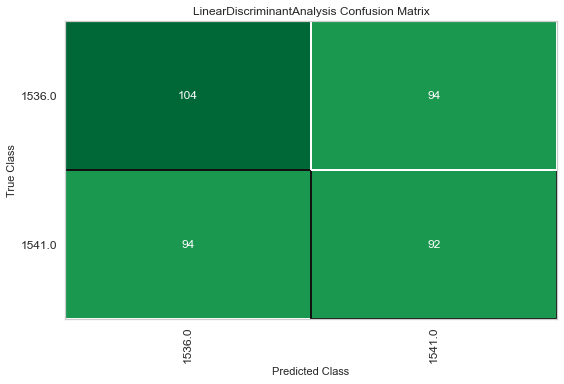

In [168]:
#We can find a better way of reporting performance using yellowbrick:
# One-line confusion matrix. We use a previously fitted model
cm_viz = confusion_matrix(
    lda, X_train4, y_train4, X_test4, y_test4,
    is_fitted=True, support=True, cmap='RdYlGn')

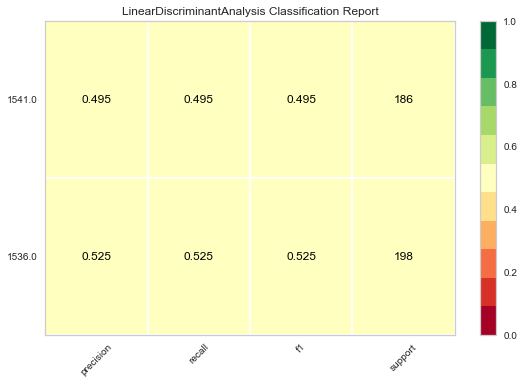

In [170]:
# One-liner report. We use a previously fitted model
cr_viz = classification_report(lda,
                               X_train4, y_train4, X_test4, y_test4,
                               is_fitted=True, support=True, cmap='RdYlGn')

## ROC

C:\Users\lgsob\anaconda3\envs\condaenv\lib\site-packages\numpy\core\numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
C:\Users\lgsob\anaconda3\envs\condaenv\lib\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


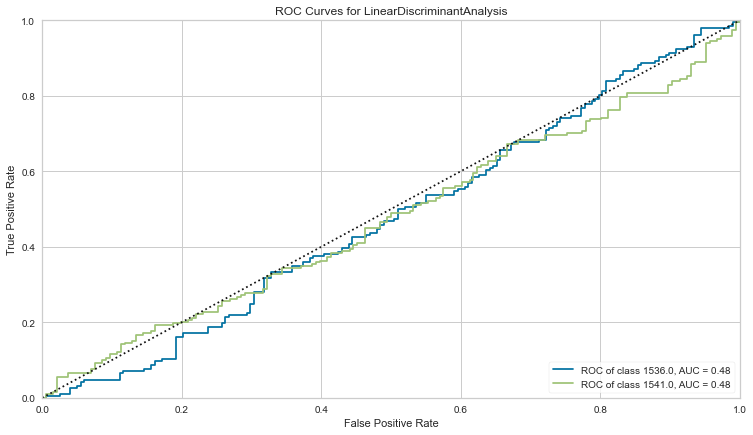

In [174]:
selected_predictors = ['D1Spectrogram', 'D1Peak1620', 'D1Latency2730','D1Peak3035']
y_train4=y_train4.replace({'1536.0':1, '1541.0':0})
y_test4=y_test4.replace({'1536.0':1, '1541.0':0})

# Fit visualizer to our classifier
roc_viz = ROCAUC(lda,
                 is_fitted=True,
                 per_class=True,
                 micro=False,
                 macro=False,
                 size=(900, 500))
roc_viz.fit(X_train4[selected_predictors], y_train4)
roc_viz.score(X_test4[selected_predictors], y_test4)
roc_viz.show();

## Decision boundaries

In [190]:
# Division train/ test

train, test = train_test_split(
    df1, test_size=0.4, stratify=df1['Identifier'], random_state=42)
print('train set:',train.shape)
print('test set:',test.shape)

train set: (576, 15)
test set: (384, 15)


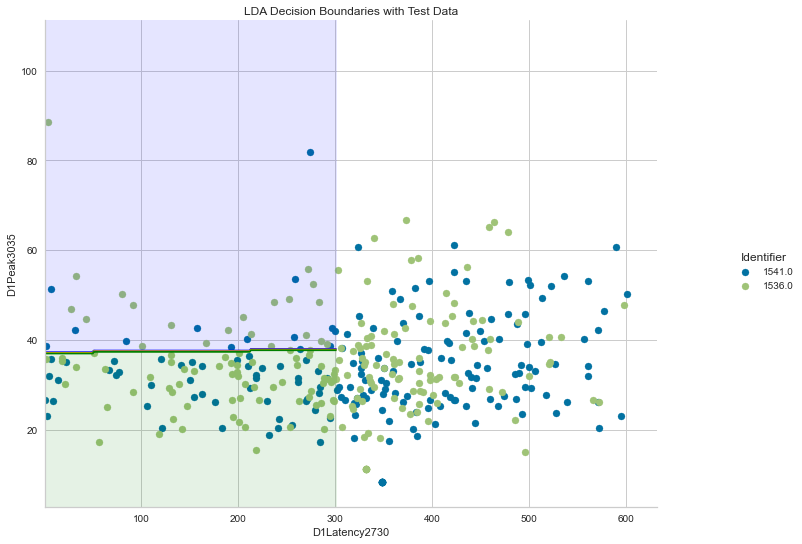

In [195]:
selected_predictors_2 = ['D1Latency2730','D1Peak3035']

# Encode the target (we'll use the encoder to retrieve the class labels)
encoder = LabelEncoder()
encoded_y_train = encoder.fit_transform(y_train4)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train4[selected_predictors_2].values, encoded_y_train)
y_pred4 = lda.predict(X_test4[selected_predictors_2].values)

N = 300
X = np.linspace(np.floor(min(X_train4["D1Latency2730"])) - 0.2,
                np.ceil(max(X_train4["D1Latency2730"]))+0.2,
                N)
Y = np.linspace(np.floor(min(X_train4["D1Peak3035"])) - 0.2,
                np.ceil(max(X_train4["D1Peak3035"]))+0.2,
                N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test,
                  hue="Identifier",
                  height=5).map(plt.scatter,
                                "D1Latency1218",
                                "D1Peak1218").add_legend()
zz = np.array([lda.predict(np.array([[xx, yy]]))
              for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

# Plot the filled and boundary contours
g.ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'orange', 'green'))
g.ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'orange', 'green'))

# Add axis and title
g.ax.set_xlabel('D1Latency2730')
g.ax.set_ylabel('D1Peak3035')
g.ax.set_title('LDA Decision Boundaries with Test Data')
g.fig.set_figheight(8)
g.fig.set_figwidth(12)

## Decision Tree

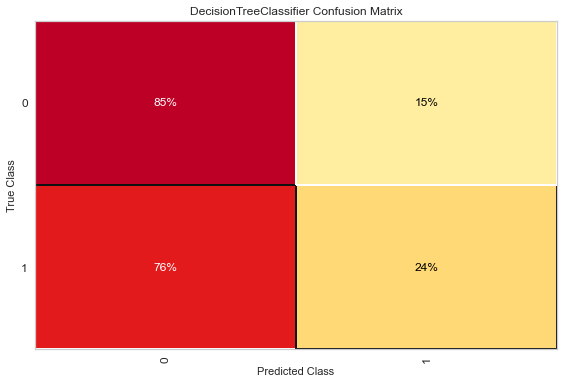

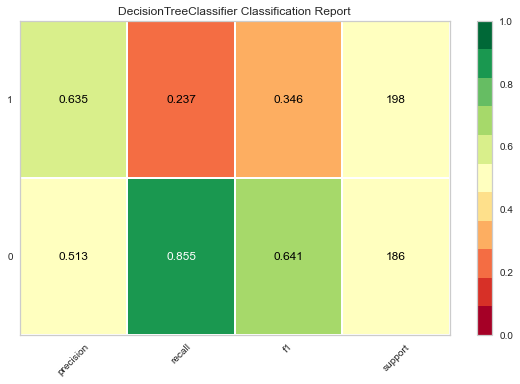

In [204]:
# Confusion matrix
dt_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
cm_dt_2 = ConfusionMatrix(dt_2, percent=True)
cm_dt_2.fit(X_train4.values, y_train4)
cm_dt_2.score(X_test4.values, y_test4)
cm_dt_2.show()

# Classification report
cr_dt_2 = ClassificationReport(dt_2, is_fitted=True, support=True, cmap='RdYlGn')
cr_dt_2.fit(X_train4.values, y_train4)
cr_dt_2.score(X_test4.values, y_test4)
cr_dt_2.show();

## Feature importance

In [206]:
pd.DataFrame(zip(X_train4.columns, dt_2.feature_importances_*100),
             columns=["Feature", "% importance"]).sort_values("% importance", ascending=False)

,Feature,% importance
3,D1Peak3035,46.683774
0,D1Spectrogram,31.297157
1,D1Peak1620,22.019069
2,D1Latency2730,0.000000


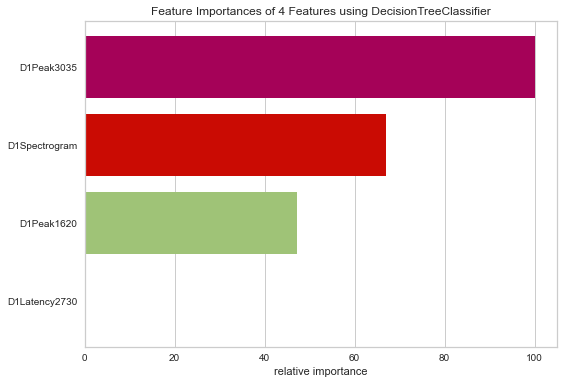

In [209]:
fi_viz = FeatureImportances(dt_2)
fi_viz.fit(X_train4, y_train4)
fi_viz.show();

In [30]:
X=df1.drop(['Identifier'], axis=1)
Y=df1.Identifier
Y_replace=Y.replace({'1536.0':1, '1541.0':0})

In [31]:
########## IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN CLASIFICACIÓN ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, Y_replace, test_size=0.2)


In [32]:
#Defino el algoritmo a utilizar
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')
#Entreno el modelo
algoritmo.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [33]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


Matriz de Confusión:
[[41 53]
 [46 52]]


We can observe that there are several that are not predicted correctly. This confusion matrix shows the data correctly predicted in the main diagonal while in the secondary diagonal, the wrong predicted are found. In this case there are 102 correct results and 90 incorrect.


In [34]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.49523809523809526


We have been able to calculate the models precision. In this case the result is 0.51, which it can be considered not acceptable. 

# Create model

In [92]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df1.drop('Identifier', axis = 'columns'),
                                        df1['Identifier'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

After defining the training data, the next step is to select the algorithm to be used. In scikit-learn, this can done by creating an estimator object. Specifically, this object stores the name of the algorithm, its parameters and hyperparameters, and contains the fit(X, y) and predict(T) methods that allow it to learn from the data and predict new observations. 

## Training

A linear regression model with ridge regularization is fitted to make the prediction based on all the available predictors. When a linear regression model includes regularization in the coefficients (ridge, lasso, elasticnet), the predictors must be standardized. To ensure that the preprocessing is done only with the training data, the transformations and the training are combined in the same pipeline.

In [93]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [94]:
# Transformations for numeric variables
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformations for categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [95]:
# The preprocessing steps and the model are combined in the same pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
_ = pipe.fit(X=X_train, y=y_train)

## Validation

The aim of a model is to predict the response variable in future observations or in observations that the model has not seen before. It is important to have in mind that the error displayed by default after training a model is usually the training error, the error the model makes in predicting the observations it has already seen. 

To achieve a more accurate estimate, and before resorting to the test set, validation strategies based on resampling can be used. All of them receive as first argument an estimator that can be directly a model or a pipeline.

Regression error metrics are always returned in the negative so that the closer the value is to 0, the better the fit. This is so that the optimization processes are always maximizing.

In [96]:
# Cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Cross validation metrics: {cv_scores}")
print(f"Cross validation metrics - mean: {cv_scores.mean()}")

Cross validation metrics: [-2.41842382 -2.36401648 -2.44592593 -2.41421125 -2.3224695 ]
Cross validation metrics - mean: -2.3930093978560882


In [97]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-2.35648566 -2.45928722 -2.31805271 -2.38894285 -2.49143542 -2.38559316
 -2.37523433 -2.32269787 -2.41199399 -2.40043633 -2.36851948 -2.34898509
 -2.40750462 -2.41415165 -2.41805662 -2.48761154 -2.41467744 -2.4041012
 -2.3376286  -2.35156965 -2.3893248  -2.39393557 -2.4108356  -2.35637942
 -2.45486217]

Média métricas de validación cruzada: -2.3947321198477654


In [98]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.023111,0.010427,0.046057,0.138044,-2.441079,-2.321040
1,0.021727,0.007772,0.127313,0.111288,-2.329663,-2.356141
2,0.020206,0.009790,0.025136,0.153610,-2.462270,-2.297458
3,0.025760,0.011427,0.067305,0.130788,-2.397768,-2.325020
4,0.018007,0.008659,0.127181,0.106442,-2.333053,-2.363042
5,0.024904,0.008368,0.017114,0.156753,-2.467599,-2.294292
6,0.020844,0.016351,0.091206,0.121900,-2.383195,-2.342603
7,0.018431,0.011707,0.082301,0.134084,-2.388988,-2.325727
8,0.028638,0.004968,0.053969,0.141960,-2.427965,-2.313993
9,0.027140,0.012410,0.049274,0.147736,-2.435769,-2.307883


C:\Users\lgsob\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


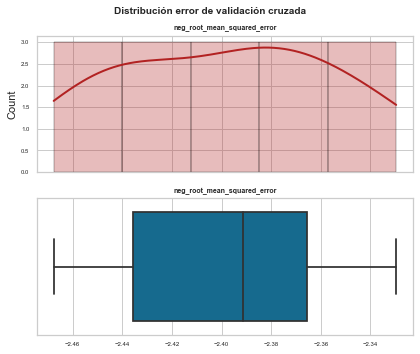

In [99]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");